# KNN (K- Nearest Neighbours)

In [1]:
# import the required libraries!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# from sklearn.cross_validation import cross_val_score
from collections import Counter

 ### data processing

In [2]:
# Load the dataset
dataset = pd.read_csv('ml_python_knn_2.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Create Features and Label# Creat 
# Considering only two fields in the feature set.
# design matrix features (X) and target vector label (y)
# numpy is required here! (*values)
features = dataset.iloc[:,[2,3]].values
label = dataset.iloc[:,4].values

In [5]:
type(features)

numpy.ndarray

In [6]:
type(label)

numpy.ndarray

In [7]:
# Train Test Split 67:33
# using model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
                                features,
                                label,
                                test_size=0.33,
                                random_state=11)

In [8]:
# instantiate learning model (k = 13)
knn = KNeighborsClassifier(n_neighbors=13)

In [9]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [10]:
# predict the response
pred = knn.predict(X_test)

In [11]:
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [12]:
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %f%%' % acc)


The accuracy of the knn classifier for k = 3 is 81.060606%


### parameter tuning

In [13]:
# creating odd list of k for KNN
neighbors = list(range(1,50,2))

In [14]:
# empty list that will hold cv scores
cv_scores = []

### cross validation

In [15]:
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [16]:
cv_scores

[0.760968660968661,
 0.7572649572649572,
 0.8065527065527066,
 0.768945868945869,
 0.7725071225071225,
 0.8018518518518519,
 0.7757834757834757,
 0.7947293447293448,
 0.7982905982905982,
 0.8022792022792021,
 0.8059829059829058,
 0.8207977207977206,
 0.813105413105413,
 0.8206552706552707,
 0.7945868945868945,
 0.8133903133903132,
 0.7833333333333334,
 0.7834757834757835,
 0.7834757834757834,
 0.7871794871794873,
 0.7797720797720797,
 0.7759259259259259,
 0.7648148148148148,
 0.7685185185185185,
 0.7833333333333334]

In [17]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [18]:
# determining the ideal value for k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 23.


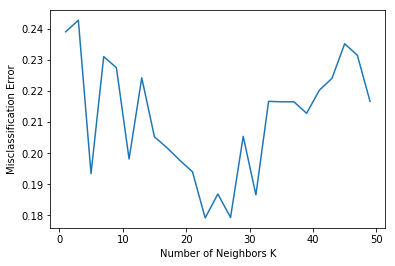

In [19]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### create model for k = 23

In [20]:
# Train Test Split 67:33
# using model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
                                features,
                                label,
                                test_size=0.33,
                                random_state=11)

In [21]:
# instantiate learning model (k = 23)
knn = KNeighborsClassifier(n_neighbors=23)

In [22]:
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [23]:
# predict the response
pred = knn.predict(X_test)

In [24]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [25]:
# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 23 is %f%%' % acc)


The accuracy of the knn classifier for k = 23 is 79.545455%


In [26]:
acc

79.54545454545455